# Synopsis

Use Jockers' [Syuzhet module](https://rdrr.io/cran/syuzhet/) in R.

To use R in Jupyter, see https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/

# Configuration

In [18]:
# methods = c("syuzhet", "afinn", "bing", "nrc", "stanford")
# Try bing or syuzhet
method = 'syuzhet'
fft_low_pass = 3
dct_low_pass = 5

# Libraries

In [19]:
library(syuzhet)
library(repr)

# Pragmas

In [20]:
options(repr.plot.width=5, repr.plot.height=3)

In [21]:
# system("export PATH=$PATH:/Users/rca2t/stanford-corenlp")

# Process

## Persuasion

In [22]:
pers.file <- "persuasion.txt"
pers <- get_text_as_string(pers.file)
pers.s_v <- get_sentences(pers)
pers.sentiment_vector <- get_sentiment(pers.s_v, method=method)

### Raw Signal

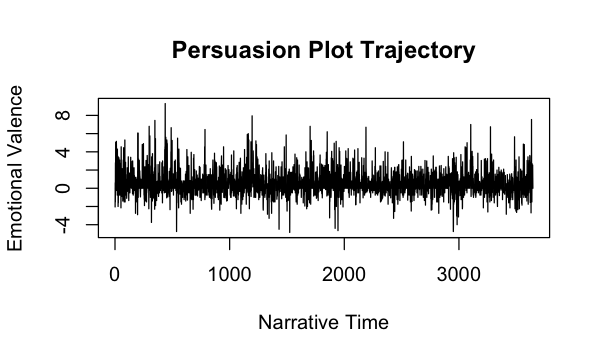

In [23]:
plot(pers.sentiment_vector, 
     type="l", 
     main="Persuasion Plot Trajectory", 
     xlab = "Narrative Time", 
     ylab= "Emotional Valence")

In [24]:
pers.ft_values <- get_transformed_values(pers.sentiment_vector, 
                                         low_pass_size=fft_low_pass, 
                                         x_reverse_len=100, 
                                         scale_vals=TRUE, 
                                         scale_range=FALSE)

Warning message in get_transformed_values(pers.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”

### Transformed

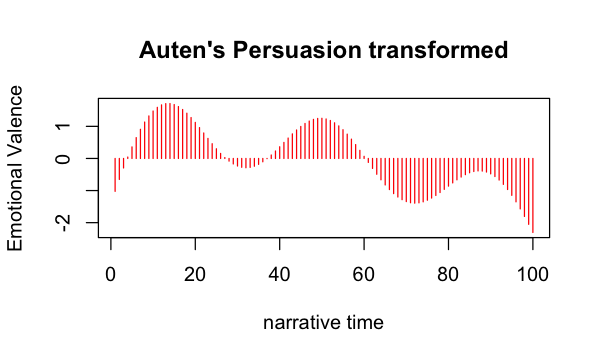

In [25]:
plot(pers.ft_values, 
     type ="h", 
     main ="Auten's Persuasion transformed", 
     xlab = "narrative time", 
     ylab = "Emotional Valence", col = "red")

## Moby Dick

In [26]:
moby_file <- "moby.txt"
moby <- get_text_as_string(moby_file)
moby.s_v <- get_sentences(moby)
moby.sentiment_vector <- get_sentiment(moby.s_v, method=method)

### Raw Signal

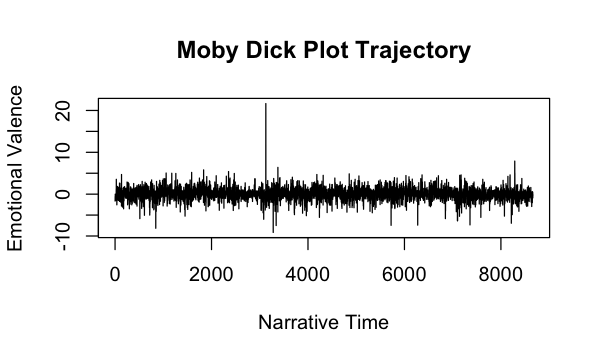

In [27]:
plot(moby.sentiment_vector, 
     type="l", 
     main="Moby Dick Plot Trajectory", 
     xlab = "Narrative Time", 
     ylab= "Emotional Valence")

In [28]:
moby.ft_values <- get_transformed_values(moby.sentiment_vector, 
                                     low_pass_size=fft_low_pass, 
                                     x_reverse_len=100,
                                     scale_vals=TRUE, 
                                     scale_range=FALSE)

Warning message in get_transformed_values(moby.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”

### Transformed

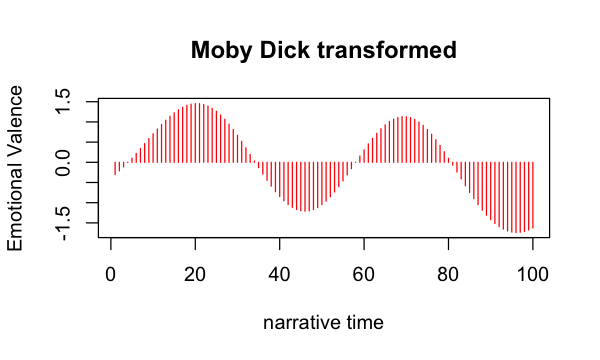

In [29]:
plot(moby.ft_values,
     type ="h", 
     main ="Moby Dick transformed", 
     xlab = "narrative time", 
     ylab = "Emotional Valence", col = "red")

## DCT Versions

### Moby Dick

In [37]:
moby.dct = get_dct_transform(
    raw_values = moby.sentiment_vector, 
    low_pass_size = dct_low_pass,
    scale_vals = T)

jpeg("moby_rplot.jpg", width = 650, height = 350)
plot(moby.dct, 
     type ="h", 
     main ="Moby Dick transformed (DCT)", 
     xlab = "narrative time", 
     ylab = "Emotional Valence", 
     col = "red")
dev.off()

pdf 
  2

### Persuasion

In [36]:
pers.dct = get_dct_transform(
    raw_values = pers.sentiment_vector, 
    low_pass_size = dct_low_pass,
    scale_vals = T)

jpeg("pers_rplot.jpg", width = 650, height = 350)
plot(pers.dct, 
     type ="h", 
     main ="Persuasion transformed (DCT)", 
     xlab = "narrative time", 
     ylab = "Emotional Valence", 
     col = "red")
dev.off()

pdf 
  2

<img src='./moby_rplot.jpg'/>
<img src='./pers_rplot.jpg'/>